# Data Source
The original data file "modcloth_final_data.json" was retrieved from https://www.kaggle.com/datasets/rmisra/clothing-fit-dataset-for-size-recommendation

## Data Manipulation
10,000 samples were used from the original file.
These 10,000 samples were then separated by a comma and updated to be apart of a Json List.
The following code then scrubs the data further so that only the waist and clothing size of samples that fit are included into a csv file to feed the machine learning algorithm

Scatter Plot of All Data


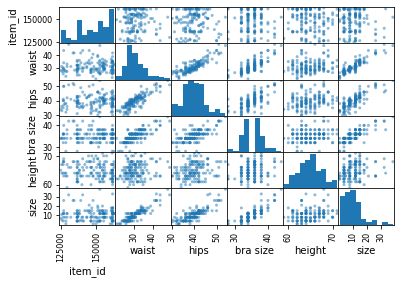

Scatter Plot of Data for Item ID: 125442


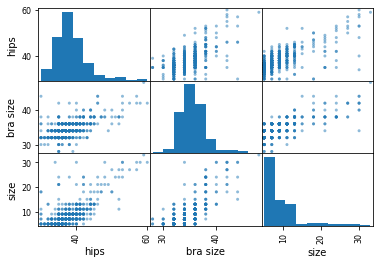

In [69]:
import json as js
import csv
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot



def ConvertHeightToInches(height):
    heightArray = height.split(' ')
    heighthFeet = heightArray[0].strip("ft")

    if heightArray.__len__() == 1:
        return int(heighthFeet) * 12
    else:
        heighthinches = heightArray[1].strip("in")

        return int(heighthFeet) * 12 + int(heighthinches)

def ConvertDataToCsv(fromFilePath, headers, toFilePath, missingFieldsAllowed, itemId = 0):
    with open(toFilePath, 'w', newline='') as outCsvFile:
        csvWriter = csv.writer(outCsvFile)
        csvWriter.writerow(headers)
        with open(fromFilePath, 'r') as openFile:
            fileContent = js.load(openFile)
            for i in fileContent["FitList"]:
                tempList = [""] * headers.__len__()
                dataCount = 0
                for j in i.keys(): # iterate over each fitting
                    if j == "item_id": # filter to only one item
                        if itemId != 0:
                            if i[j] != itemId:
                                break
                    if j == "fit":
                        if i[j] != "fit":
                            break # do not include records that do not fit
                    if j == "hips":
                        i[j] = i[j].split(".")[0]
                    if j == "height":
                        i[j] = ConvertHeightToInches(i[j])
                    if headers.__contains__(j):
                        tempList[headers.index(j)] = i[j]
                        dataCount = dataCount + 1
                if dataCount >= headers.__len__()-missingFieldsAllowed:
                    csvWriter.writerow(tempList)


sourceFileUri = r"Data\modcloth_final_data_medium.json"
allOutputFileUri = r"Data\modcloth_final_data_all.csv"
outputFileUri = r"Data\modcloth_final_data_medium.csv"
headers = [ "item_id", "waist", "cup size", "hips", "bra size", "length", "height","fit", "size" ]
missingFieldsAllowed = 0
itemId = "125442"

userHeaders = [ "hips", "bra size", "size" ] #"user_id", "cup size", "bra size", "height",
ConvertDataToCsv(sourceFileUri, userHeaders, outputFileUri, missingFieldsAllowed, itemId)
ConvertDataToCsv(sourceFileUri, headers, allOutputFileUri, missingFieldsAllowed)

# viewing the data
df = pd.read_csv(allOutputFileUri)
df2 = pd.read_csv(outputFileUri)

print("Scatter Plot of All Data")
scatter_matrix(df)
pyplot.show()

print("Scatter Plot of Data for Item ID: " + str(itemId))
scatter_matrix(df2)
pyplot.show()

### Processing prepared data

Histogram of the data


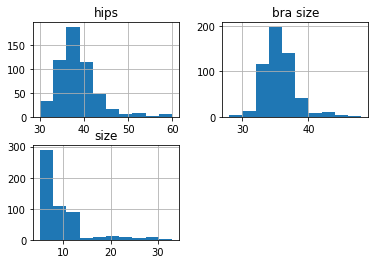

Scatter plot of the data


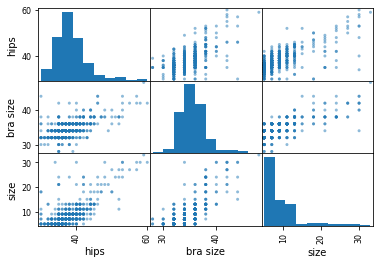

Running 10 random simulations of the Model...
Confusion Matrix of the Models Predictions


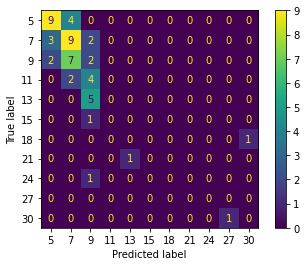

The Average Accuracy for the model over 10 simulations is 39.08%

Enter a waist size in inches to see the recommended size for Item ID 125442: 28
The recommended clothing size for item ID 125442 to fit a person with a 28 inch waist is [5]

Would you like to see the recommendation for a different waist size? 
Press (Y + [Enter]) for Yes, Any other key for No: Y

Enter a waist size in inches to see the recommended size for Item ID 125442: 37
The recommended clothing size for item ID 125442 to fit a person with a 37 inch waist is [7]

Would you like to see the recommendation for a different waist size? 
Press (Y + [Enter]) for Yes, Any other key for No: N



In [68]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

csvFilePath = r"Data/modcloth_final_data_medium.csv"

df = pd.read_csv(csvFilePath)

# Showing distribution of data
print("Histogram of the data")
df.hist()
pyplot.show()

print("Scatter plot of the data")
scatter_matrix(df)
pyplot.show()

# make model
log_model = linear_model.LogisticRegression(max_iter=5000)
y = df.values[:, 2]
y=y.astype('int')
x = df.values[:, 0:1]
x=x.astype('int')
averagePercentage = 0
print("Running 10 random simulations of the Model...")
for i in range(10):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.10)

    # train model
    log_model.fit(X_train, y_train)

    # predict
    #y_pred = mylog_model.predict(x)
    y_pred_log = log_model.predict(X_test)

    if i == 9:
        print("Confusion Matrix of the Models Predictions")
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)
        pyplot.show()
    averagePercentage = averagePercentage + round(log_model.score(X_test, y_test) * 100, 2)
    #print("The Accuracy of the model is " + str(round(log_model.score(X_test, y_test) * 100, 2)) + "%\n")
print("The Average Accuracy for the model over 10 simulations is " + str(round(averagePercentage/10, 2)) + "%\n")

#print(metrics.accuracy_score(y, y_pred))
#print(metrics.accuracy_score(y_test, np.argmax(y_pred_lin, axis=1)))
#print(metrics.accuracy_score(y_test, y_pred_svm))
itemId = "125442"
anotherRecommendation = "Y"

while (anotherRecommendation == "Y"):
    waistSize = int(input("Enter a waist size in inches to see the recommended size for Item ID " + itemId + ": "))
    print("The recommended clothing size for item ID " + itemId + " to fit a person with a " + str(waistSize) + " inch waist is " + str(log_model.predict([[waistSize]])) + "\n")
    anotherRecommendation = input("Would you like to see the recommendation for a different waist size? \nPress (Y + [Enter]) for Yes, Any other key for No: ")
    print()